In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [12]:
df=pd.read_csv('GOOGL.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [16]:
df['Close'] = df['Close'].astype(str).str.replace(',','').astype(float)
df = pd.DataFrame(df['Close'], columns=['Close'])

In [18]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

timesteps = 50
batch_size = 32
epochs = 50

# Split data
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size - timesteps:]

# Generators
train_generator = TimeseriesGenerator(train_data, train_data,
                                      length=timesteps, batch_size=batch_size)
test_generator = TimeseriesGenerator(test_data, test_data,
                                     length=timesteps, batch_size=batch_size)

In [19]:
model_rnn = Sequential([
    SimpleRNN(100, return_sequences=True, input_shape=(timesteps,1)),
    Dropout(0.2),
    SimpleRNN(100, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(100),
    Dropout(0.2),
    Dense(50),
    Dense(1)
])
model_rnn.compile(optimizer=Adam(0.001), loss='mean_squared_error')
print("Training Simple RNN model...")
model_rnn.fit(train_generator, epochs=epochs, validation_data=test_generator, verbose=1)
y_pred_rnn = model_rnn.predict(test_generator)


Training Simple RNN model...
Epoch 1/50


C:\Users\YOGESH TALEKAR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\YOGESH TALEKAR\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.4287 - val_loss: 0.0580
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0177 - val_loss: 0.0274
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0075 - val_loss: 0.0491
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0043 - val_loss: 0.0474
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0023 - val_loss: 0.0429
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0019 - val_loss: 0.0340
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014 - val_loss: 0.0256
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.6743e-04 - val_loss: 0.0443
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011 - val_loss: 0.0323
Epoch 10/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 6.1189e-04 - val_loss: 0.0403
Epoch 11/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.3578e-04 - val_loss: 0.0489
Epoch 12/50
110/110 ━━━━━━━━━━━━━━━━━━━━

In [20]:
model_gru = Sequential([
    GRU(100, return_sequences=True, input_shape=(timesteps,1)),
    Dropout(0.2),
    GRU(100, return_sequences=True),
    Dropout(0.2),
    GRU(100),
    Dropout(0.2),
    Dense(50),
    Dense(1)
])
model_gru.compile(optimizer=Adam(0.001), loss='mean_squared_error')
print("Training GRU model...")
model_gru.fit(train_generator, epochs=epochs, validation_data=test_generator, verbose=1)
y_pred_gru = model_gru.predict(test_generator)


Training GRU model...
Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0020 - val_loss: 4.7708e-04
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0018 - val_loss: 0.0134
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 3.5504e-04 - val_loss: 0.0065
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 2.6809e-04 - val_loss: 5.7352e-04
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 1.1195e-04 - val_loss: 0.0012
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 1.2115e-04 - val_loss: 2.5457e-04
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 4.3455e-04 - val_loss: 0.0122
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 4.9872e-04 - val_loss: 0.0098
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.5280e-04 - val_loss: 0.0011
Epoch 10/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 2.3064e-04 - val_loss: 0.0029
Epoch 11/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 1

In [21]:
model_lstm = Sequential([
    LSTM(100, return_sequences=True, input_shape=(timesteps,1)),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100),
    Dropout(0.2),
    Dense(50),
    Dense(1)
])
model_lstm.compile(optimizer=Adam(0.001), loss='mean_squared_error')
print("Training LSTM model...")
model_lstm.fit(train_generator, epochs=epochs, validation_data=test_generator, verbose=1)
y_pred_lstm = model_lstm.predict(test_generator)

Training LSTM model...
Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0064 - val_loss: 6.7213e-04
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 8.4919e-04 - val_loss: 0.0088
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 5.4713e-04 - val_loss: 6.8943e-04
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 5.0938e-04 - val_loss: 0.0059
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 2.0702e-04 - val_loss: 0.0022
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 3.9947e-04 - val_loss: 0.0013
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0013 - val_loss: 0.0046
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 5.0048e-04 - val_loss: 8.9862e-04
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 1.1259e-04 - val_loss: 0.0032
Epoch 10/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 2.8493e-04 - val_loss: 9.5951e-04
Epoch 11/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - lo

In [22]:
y_test = []
for i in range(len(test_generator)):
    _, true_prices = test_generator[i]
    y_test.extend(true_prices)
y_test = np.array(y_test).reshape(-1,1)
y_test_actual = scaler.inverse_transform(y_test)

y_pred_rnn_actual = scaler.inverse_transform(y_pred_rnn)
y_pred_lstm_actual = scaler.inverse_transform(y_pred_lstm)
y_pred_gru_actual = scaler.inverse_transform(y_pred_gru)

mse_rnn = np.mean((y_test_actual - y_pred_rnn_actual) ** 2)

mse_lstm = np.mean((y_test_actual - y_pred_lstm_actual) ** 2)

y_pred_gru_actual = scaler.inverse_transform(y_pred_gru)


mse_gru = np.mean((y_test_actual - y_pred_gru_actual) ** 2)

print("Simple RNN RMSE:", mse_rnn**0.5)
print("LSTM RMSE:", mse_lstm**0.5)
print("GRU RMSE:", mse_gru**0.5)

Simple RNN RMSE: 459.5221136733839
LSTM RMSE: 91.1916944574317
GRU RMSE: 215.604349316612


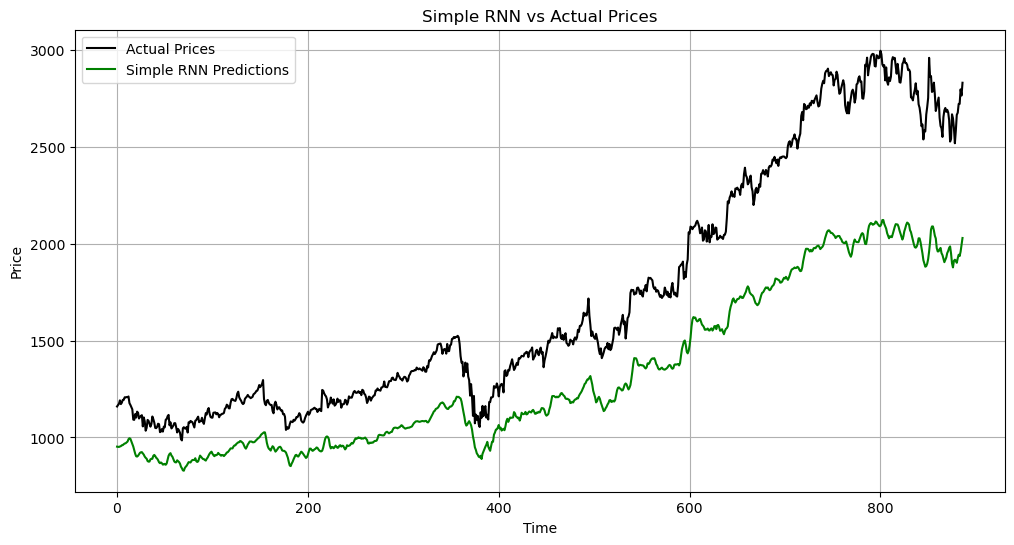

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices', color='black')
plt.plot(y_pred_rnn_actual, label='Simple RNN Predictions', color='green')
plt.title('Simple RNN vs Actual Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

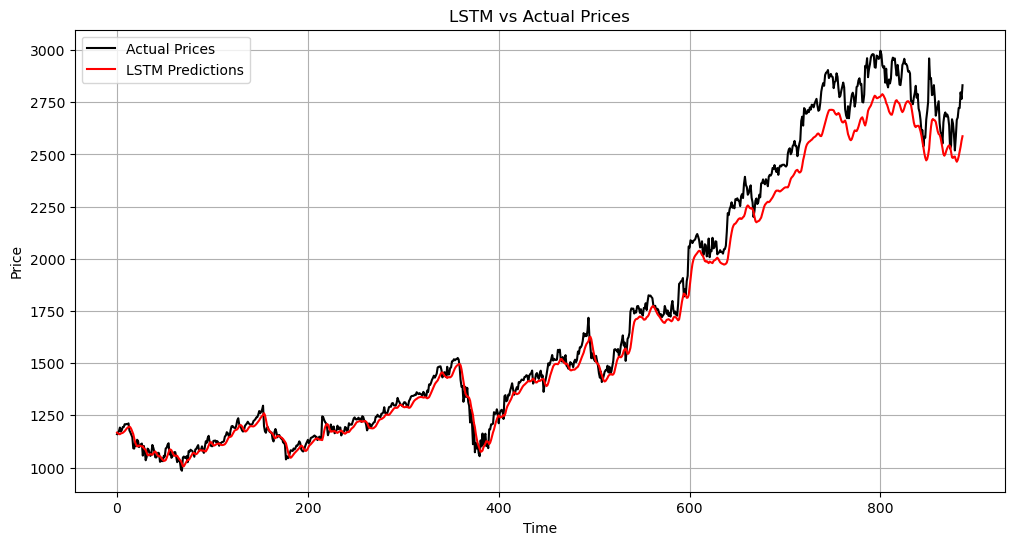

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices', color='black')
plt.plot(y_pred_lstm_actual, label='LSTM Predictions', color='red')
plt.title('LSTM vs Actual Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

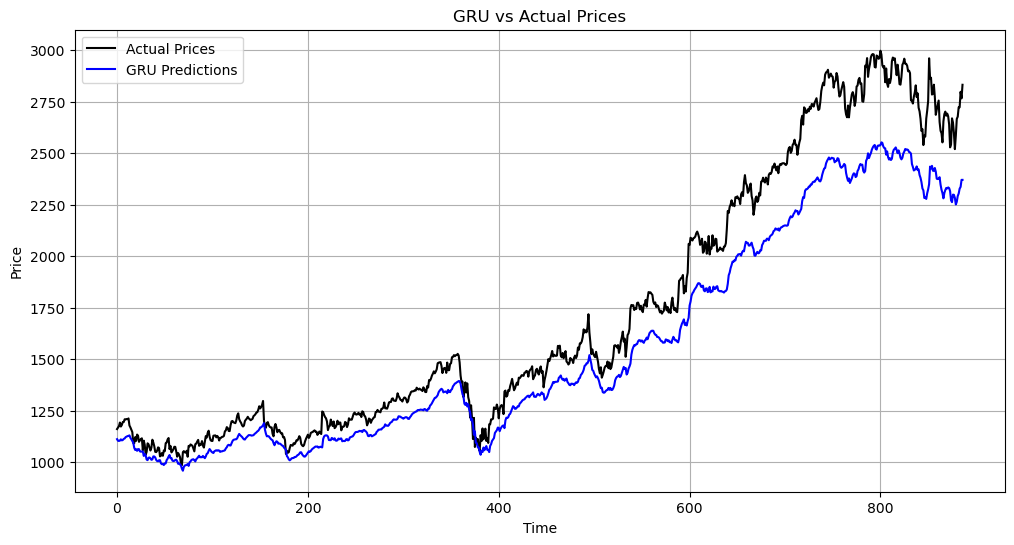

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Prices', color='black')
plt.plot(y_pred_gru_actual, label='GRU Predictions', color='blue')
plt.title('GRU vs Actual Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

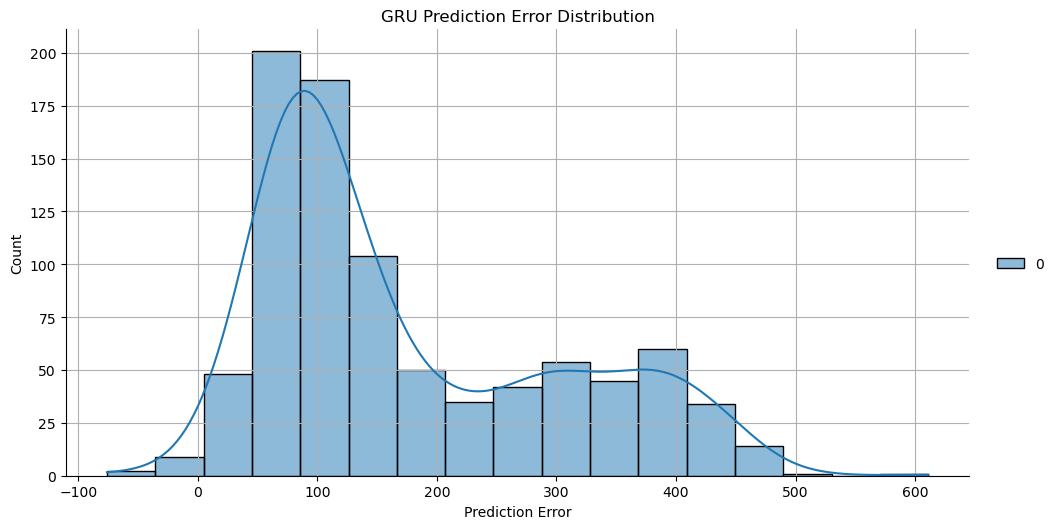

In [35]:
errors_gru = y_test_actual - y_pred_gru_actual
sns.displot(errors_gru, kde=True, color='purple', height=5, aspect=2)
plt.title("GRU Prediction Error Distribution")
plt.xlabel("Prediction Error")
plt.grid(True)
plt.show()

In [25]:
pip install jugaad_data

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 2.2.5 requires click>=8.0, but you have click 7.1.2 which is incompatible.
flask-appbuilder 4.5.3 requires click<9,>=8, but you have click 7.1.2 which is incompatible.
black 24.8.0 requires click>=8.0.0, but you have click 7.1.2 which is incompatible.
conda-index 0.5.0 requires click>=8, but you have click 7.1.2 which is incompatible.
dask 2024.8.2 requires click>=8.1, but you have click 7.1.2 which is incompatible.
distributed 2024.8.2 requires click>=8.0, but you have click 7.1.2 which is incompatible.


In [37]:
pip install timetravel

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for timetravel: filename=timetravel-1.0-py3-none-any.whl size=4269 sha256=c06b49f526b2bf08336f153464a9beecd29e21cf625c6c84fd214da48701f960
  Stored in directory: c:\users\yogesh talekar\appdata\local\pip\cache\wheels\f1\d6\7c\a538a9acf69aa5340af07f25d1293d3bfc5733abd4181156b0
Successfully built timetravel
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import timetravel

future = timetravel.predict_future(model_gru, days=1, data_scaled=data_scaled, scaler=scaler,timesteps=5,start_date=pd.to_datetime(data['Date '].iloc[-1]).strftime('%Y-%m-%d'))
print("Future predicted prices:\n", future)

In [45]:
import timetravel
predict_future = lambda model, data, scaler, ts, days: scaler.inverse_transform(
    np.array([model.predict(data[-ts:].reshape(1, ts, 1), verbose=0)[0][0] 
              for _ in range(days)]).reshape(-1, 1)
)
future = predict_future(model_gru, data_scaled, scaler, 5, 1)
print("Future predicted prices:\n", future)


Future predicted prices:
 [[2060.5864]]
